In [1]:
# # Packages to locally download data into the notebook:
# import requests
# import zipfile
import glob

#Numpy
import numpy as np

#For image plotting
import skimage.io

#Matplotlib plotting packages
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

#scipy
import scipy
from scipy import optimize
from scipy.optimize import curve_fit

# For loading bars
from tqdm.notebook import tqdm as tqdm

import pandas as pd

Import Images, Background Subtract, Flatten, Intensity Values

steps:
1) convert fig 2 to table - used https://apps.automeris.io/wpd/
2) use eqn in paper to fit
3) see if i get matching K

Also... figure out how to get a speed read out - possibly gliding assay pipeline from rachel or soichi

## Data Import
Read in digitized data and turn into a dataframe:

In [2]:
file_path = '../../data/mot-cal/'
file_type = '.csv'
comment = '%'

#-----------------------------------------------------------------------------------------------------------------#
### Fgure 2 Data ###
#-----------------------------------------------------------------------------------------------------------------#
file_name = 'Schief2003PNAS_Fig2'
schief2_df = pd.read_csv(file_path + file_name + file_type, comment=comment, names=["kx", "ky", #black
                                                                                     "yx", "yy", #yellow
                                                                                     "gx", "gy", #green
                                                                                     "bx", "by", #blue
                                                                                     "rx", "ry"]) #red
schief2_df=schief2_df[2:]
schief2_df.index = schief2_df.index - 2
schief2_df = schief2_df.astype(float)

#-----------------------------------------------------------------------------------------------------------------#
### Figure 4A Data (Phosphate concentration vs speed for difference ATP concentrations) ###
#-----------------------------------------------------------------------------------------------------------------#
file_name = 'Schief2003PNAS_Fig4A'
schief4A_df = pd.read_csv(file_path + file_name + file_type, comment=comment, names=["cx", "cy", #cyan (light blue)
                                                                                     "yx", "yy", #yellow
                                                                                     "kx", "ky", #black
                                                                                     "rx", "ry", #red
                                                                                     "gx", "gy", #green
                                                                                     "bx", "by"]) #blue
schief4A_df=schief4A_df[2:]
schief4A_df.index = schief4A_df.index - 2
schief4A_df = schief4A_df.astype(float)

#-----------------------------------------------------------------------------------------------------------------#
### Figure 4B Data (ADP concentration vs speed for difference ATP concentrations) ###
#-----------------------------------------------------------------------------------------------------------------#
file_name = 'Schief2003PNAS_Fig4B'
schief4B_df = pd.read_csv(file_path + file_name + file_type, comment=comment, names=["yx", "yy", #yellow
                                                                                     "kx", "ky", #black
                                                                                     "rx", "ry", #red
                                                                                     "gx", "gy", #green
                                                                                     "bx", "by"]) #blue
schief4B_df=schief4B_df[2:]
schief4B_df.index = schief4B_df.index - 2
schief4B_df = schief4B_df.astype(float)

Make data frames for each color line and drop all nans

In [3]:
#Figure 2 (Speed vs ATP Conc)
schief2_df_k = schief2_df[['kx', 'ky']].dropna()
schief2_df_y = schief2_df[['yx', 'yy']].dropna()
schief2_df_g = schief2_df[['gx', 'gy']].dropna()
schief2_df_b = schief2_df[['bx', 'by']].dropna()
schief2_df_r = schief2_df[['rx', 'ry']].dropna()
#------------------------------------------------#
#Figure 4A (Speed vs P Conc)
schief4A_df_k = schief4A_df[['kx', 'ky']].dropna()
schief4A_df_y = schief4A_df[['yx', 'yy']].dropna()
schief4A_df_g = schief4A_df[['gx', 'gy']].dropna()
schief4A_df_b = schief4A_df[['bx', 'by']].dropna()
schief4A_df_r = schief4A_df[['rx', 'ry']].dropna()
schief4A_df_c = schief4A_df[['cx', 'cy']].dropna()
#------------------------------------------------#
#Figure 4B (Speed vs ADP Conc)
schief4B_df_k = schief4B_df[['kx', 'ky']].dropna()
schief4B_df_y = schief4B_df[['yx', 'yy']].dropna()
schief4B_df_g = schief4B_df[['gx', 'gy']].dropna()
schief4B_df_b = schief4B_df[['bx', 'by']].dropna()
schief4B_df_r = schief4B_df[['rx', 'ry']].dropna()

Plot each data set:
Figure 2:

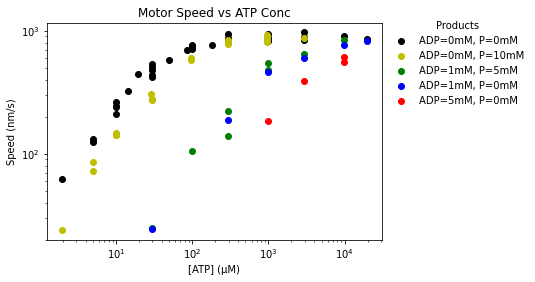

In [4]:
#plt.scatter(schief_blacky, schief_blackx, color='k')
plt.scatter(schief2_df_k['kx'], schief2_df_k['ky'], color='k', label = 'ADP=0mM, P=0mM')
plt.scatter(schief2_df_y['yx'], schief2_df_y['yy'], color='y', label = 'ADP=0mM, P=10mM')
plt.scatter(schief2_df_g['gx'], schief2_df_g['gy'], color='g', label = 'ADP=1mM, P=5mM')
plt.scatter(schief2_df_b['bx'], schief2_df_b['by'], color='b', label = 'ADP=1mM, P=0mM')
plt.scatter(schief2_df_r['rx'], schief2_df_r['ry'], color='r', label = 'ADP=5mM, P=0mM')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('[ATP] (µM)')
plt.ylabel('Speed (nm/s)')
plt.title ('Motor Speed vs ATP Conc')
plt.legend(title = 'Products', framealpha=0, bbox_to_anchor=(1, 1.05))

Figure 4A

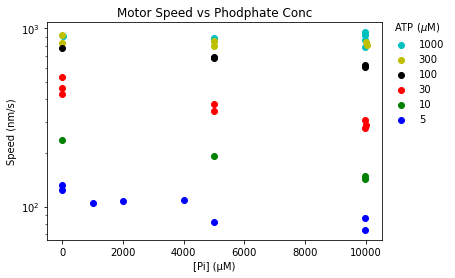

In [5]:
#plt.scatter(schief_blacky, schief_blackx, color='k')
plt.scatter(schief4A_df_c['cx'], schief4A_df_c['cy'], color='c', label = '1000')
plt.scatter(schief4A_df_y['yx'], schief4A_df_y['yy'], color='y', label = '300')
plt.scatter(schief4A_df_k['kx'], schief4A_df_k['ky'], color='k', label = '100')
plt.scatter(schief4A_df_r['rx'], schief4A_df_r['ry'], color='r', label = '30')
plt.scatter(schief4A_df_g['gx'], schief4A_df_g['gy'], color='g', label = '10')
plt.scatter(schief4A_df_b['bx'], schief4A_df_b['by'], color='b', label = '5')


plt.yscale('log')
plt.xlabel('[Pi] (µM)')
plt.ylabel('Speed (nm/s)')
plt.title ('Motor Speed vs ATP Conc')
plt.title ('Motor Speed vs Phodphate Conc')
plt.legend(title = 'ATP ($\mu$M)', framealpha=0, bbox_to_anchor=(1, 1.05))

Figure 4B

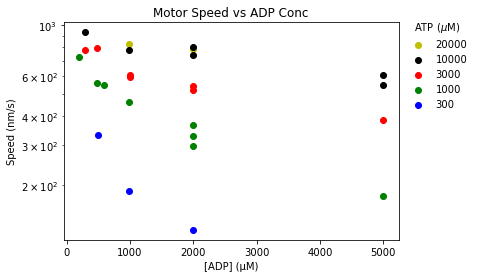

In [6]:
#plt.scatter(schief_blacky, schief_blackx, color='k')
plt.scatter(schief4B_df_y['yx'], schief4B_df_y['yy'], color='y', label = '20000')
plt.scatter(schief4B_df_k['kx'], schief4B_df_k['ky'], color='k', label = '10000')
plt.scatter(schief4B_df_r['rx'], schief4B_df_r['ry'], color='r', label = '3000')
plt.scatter(schief4B_df_g['gx'], schief4B_df_g['gy'], color='g', label = '1000')
plt.scatter(schief4B_df_b['bx'], schief4B_df_b['by'], color='b', label = '300')

plt.yscale('log')
plt.xlabel('[ADP] (µM)')
plt.ylabel('Speed (nm/s)')
plt.title ('Motor Speed vs ADP Conc')
plt.legend(title = 'ATP ($\mu$M)', framealpha=0, bbox_to_anchor=(1, 1.05))

## Fit Data
### Fits for Speed vs ATP plot (Figure 2)
Write function for fitting Speed to ATP concnetration based on paper eqn1. Drop the second term in the numerator because Keq is way larger than [ADP]*[P] - Here, fit the black curve which is the data with no products

In [7]:
#Speed ATP fit
def kcatKm_eqn(conc, kcat, Km):
    """
    Given a concentration value in uM, this function returns motor speeds in nm/s
    
    Parameters:
    conc = 1D array of ATP concentrations in uM units
    kcat = maximum hydrolysis rate at saturating ATP units 1/s
    Km = concnetration at which motors walk at half max speed in units uM
    
    Returns:
    A 1D array of motor speeds corresponding to the given concentrations
    """
    
    return (kcat*conc)/(Km +conc)



#Curve-fit to the Langmuir curve
def kcatKm_curve_fit(conc, speeds, maxconc, d, p0):
    """
    Performs a curve fitting using scipy.optimize.curve_fit to fit data
    
    Parameters
    conc = 1D array of ATP concentrations in uM units
    speeds = 1D array of measured motor speeds in 1/s units
    maxconc = maximum concentration of data taken in uM units
    p0 = 1D list with 2 entries of parameter guesses for kcat and Km
    
    Returns
    param = 1D list with fit values of each parameter (kcat and Km)
    curve = 1D array of motor speeds for every concentration value in xvals
    xvals = 1D array from 0 to maxconc with step size 1
    """
    
    
    #Curve fits and returns parameter values as well as the covarience
    param, param_cov = curve_fit(kcatKm_eqn, 
                                 conc, 
                                 speeds/d,
                                 p0, 
                                 bounds = (np.zeros(2), np.ones([2])*np.inf))

    #stores the new function information according to the coefficients given by curve-fit() function 
    xvals=np.linspace(0, int(maxconc+1), int(maxconc+1))
    curve = d*kcatKm_eqn(xvals, param[0], param[1])
    
    return param, curve, xvals


Fit data for no products, fit kcat ($\gamma$) and Kt

In [8]:
param2_k, speeds2_k, atpconc2 = kcatKm_curve_fit(schief2_df_k['kx'], 
                                                    schief2_df_k['ky'], 
                                                    np.max(schief2_df_k['kx']), 
                                                    8, 
                                                    [113, 28.1])


Plot the measured and fit data - yay it looks like the paper

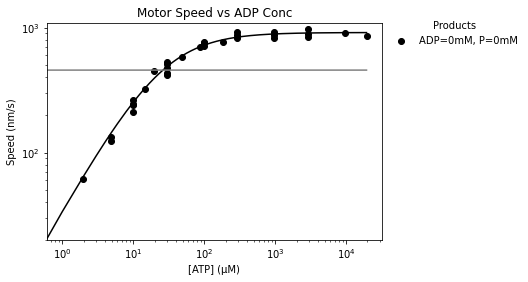

In [9]:
plt.scatter(schief2_df_k['kx'], schief2_df_k['ky'], color='k', label = 'ADP=0mM, P=0mM')
plt.plot(atpconc2, speeds2_k, color='k')

plt.plot(atpconc2, (8*114.5/2)*np.ones(len(atpconc2)), color='grey')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('[ATP] (µM)')
plt.ylabel('Speed (nm/s)')
plt.ylim(20, 1100)
plt.title ('Motor Speed vs ADP Conc')
plt.legend(title = 'Products', framealpha=0, bbox_to_anchor=(1, 1.05))

List the kcat and Km values for each experimental parameter

In [10]:
kcat = round(param2_k[0], 1)
Kt = round(param2_k[1], 1)
print('black: kcat = ' + str(kcat) + ', Km = ' + str(Kt))

black: kcat = 114.5, Km = 26.2


Function to fit data with products. Use kcat from no product data, fit Km values - one parameter speed fits

In [11]:
#Speed ATP fit
def Km_eqn(conc, Km):
    """
    Given a concentration value in uM, this function returns motor speeds in nm/s
    
    Parameters:
    conc = 1D array of ATP concentrations in uM units
    kcat = maximum hydrolysis rate at saturating ATP units 1/s
    Km = concnetration at which motors walk at half max speed in units uM
    
    Returns:
    A 1D array of motor speeds corresponding to the given concentrations
    """
    
    return (conc)/(Km +conc)



#Curve-fit to the Langmuir curve
def Km_curve_fit(conc, speeds, maxconc, d, kcat, p0):
    """
    Performs a curve fitting using scipy.optimize.curve_fit to fit data
    
    Parameters
    conc = 1D array of ATP concentrations in uM units
    speeds = 1D array of measured motor speeds in 1/s units
    maxconc = maximum concentration of data taken in uM units
    p0 = 1D list with 2 entries of parameter guesses for kcat and Km
    
    Returns
    param = 1D list with fit values of each parameter (kcat and Km)
    curve = 1D array of motor speeds for every concentration value in xvals
    xvals = 1D array from 0 to maxconc with step size 1
    """
    
    
    #Curve fits and returns parameter values as well as the covarience
    param, param_cov = curve_fit(Km_eqn, 
                                 conc, 
                                 speeds/(d*kcat),
                                 p0, 
                                 bounds = (np.zeros(1), np.ones([1])*np.inf))

    #stores the new function information according to the coefficients given by curve-fit() function 
    xvals=np.linspace(0, int(maxconc+1), int(maxconc+1))
    curve = d*kcat*Km_eqn(xvals, param[0])
    
    return param, curve, xvals


Fit data with products

In [12]:
param2_y, speeds2_y, atpconc2 = Km_curve_fit(schief2_df_y['yx'], 
                                                    schief2_df_y['yy'], 
                                                    np.max(schief2_df_k['kx']), 
                                                    8, 
                                                    kcat, 
                                                    [28.1])
param2_g, speeds2_g, atpconc2 = Km_curve_fit(schief2_df_g['gx'], 
                                                    schief2_df_g['gy'], 
                                                    np.max(schief2_df_k['kx']), 
                                                    8, 
                                                    kcat, 
                                                    [28.1])
param2_b, speeds2_b, atpconc2 = Km_curve_fit(schief2_df_b['bx'], 
                                                    schief2_df_b['by'], 
                                                    np.max(schief2_df_k['kx']), 
                                                    8, 
                                                    kcat, 
                                                    [28.1])
param2_r, speeds2_r, atpconc2 = Km_curve_fit(schief2_df_r['rx'], 
                                                    schief2_df_r['ry'], 
                                                    np.max(schief2_df_k['kx']), 
                                                    8, 
                                                    kcat, 
                                                    [28.1])


Plot

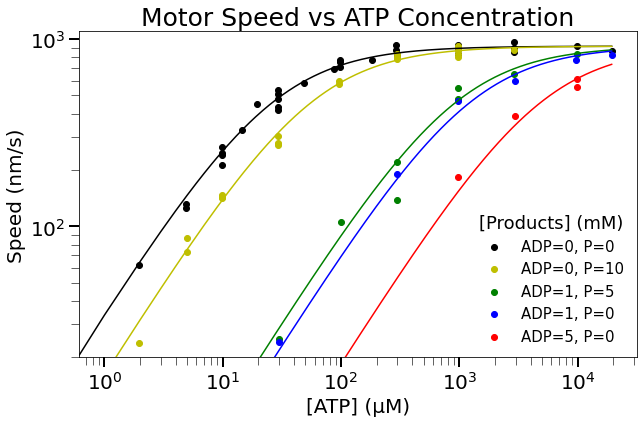

In [13]:
fig, ax = plt.subplots(figsize = (10,6))

plt.scatter(schief2_df_k['kx'], schief2_df_k['ky'], color='k', label = 'ADP=0, P=0')
plt.scatter(schief2_df_y['yx'], schief2_df_y['yy'], color='y', label = 'ADP=0, P=10')
plt.scatter(schief2_df_g['gx'], schief2_df_g['gy'], color='g', label = 'ADP=1, P=5')
plt.scatter(schief2_df_b['bx'], schief2_df_b['by'], color='b', label = 'ADP=1, P=0')
plt.scatter(schief2_df_r['rx'], schief2_df_r['ry'], color='r', label = 'ADP=5, P=0')
plt.plot(atpconc2, speeds2_k, color='k')
plt.plot(atpconc2, speeds2_y, color='y')
plt.plot(atpconc2, speeds2_g, color='g')
plt.plot(atpconc2, speeds2_b, color='b')
plt.plot(atpconc2, speeds2_r, color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('[ATP] (µM)', size=20)
plt.ylabel('Speed (nm/s)', size=20)
plt.xticks(fontsize = 20)
plt.tick_params(which='major', length = 10, width = 2)
plt.tick_params(which='minor', length = 8)
plt.yticks(fontsize = 20)
plt.ylim(20, 1100)
plt.title ('Motor Speed vs ATP Concentration', size = 25)
plt.legend(title = '[Products] (mM)', framealpha=0, title_fontsize = 18, fontsize = 15, loc='lower right')#, bbox_to_anchor=(1, 1.05))

#fig.savefig('Schief2_kcatKmfit')

In [14]:
kcat = round(param2_k[0], 1)
Km_k = round(param2_k[1], 1)
Km_y = round(param2_y[0], 1)
Km_g = round(param2_g[0], 1)
Km_b = round(param2_b[0], 1)
Km_r = round(param2_r[0], 1)

Kp = 10000/((Km_y/Km_k) -1)
Kd_b = 1000/((Km_b/Km_k) -1)
Kd_r = 5000/((Km_r/Km_k) -1)
Kd = (Kd_b+Kd_r)/2
Kdp = 1000*5000/((Km_g/Km_k) - 1 - (1000/Kd) - (5000/Kp))
sigma = Kdp/(Kd*Kp)

Print Km values

In [15]:
print('black: kcat = ' + str(kcat) + ', Km = ' + str(Km_k))
print('yellow: Km = ' + str(Km_y) + ', Kp = ' + str(Kp))
print('green: Km = ' + str(Km_g) + ', Kdp = ' + str(Kdp))
print('blue: Km = ' + str(Km_b) + ', Kd_b = ' + str(Kd_b))
print('red: Km = ' + str(Km_r) + ', Kd_r = ' + str(Kd_r))
print('Kd = ' + str(Kd))
print('sigma = ' + str(sigma))

black: kcat = 114.5, Km = 26.2
yellow: Km = 55.8, Kp = 8851.35135135135
green: Km = 927.7, Kdp = -713642.492855537
blue: Km = 1225.9, Kd_b = 21.838793031591226
red: Km = 4856.4, Kd_r = 27.121030185085505
Kd = 24.479911608338366
sigma = -3.293527363365209


In [16]:
print('black: kcat = ' + str(round(param2_k[0], 1)) + ', Km = ' + str(round(param2_k[1], 1)))
print('yellow: Km = ' + str(round(param2_y[0], 1)))
print('green: Km = ' + str(round(param2_g[0], 1)))
print('blue: Km = ' + str(round(param2_b[0], 1)))
print('red: Km = ' + str(round(param2_r[0], 1)))

black: kcat = 114.5, Km = 26.2
yellow: Km = 55.8
green: Km = 927.7
blue: Km = 1225.9
red: Km = 4856.4


Check all the fits...

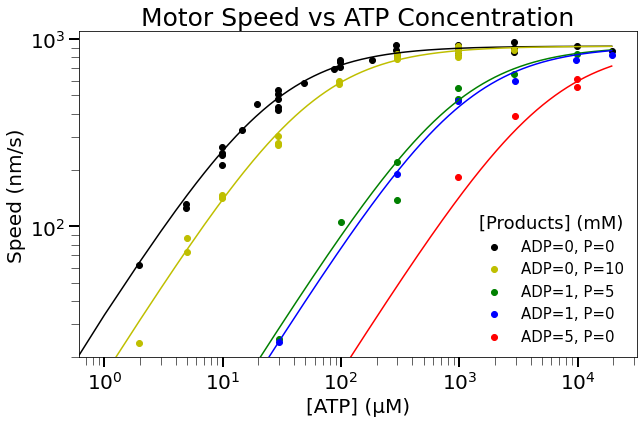

In [25]:
fig, ax = plt.subplots(figsize = (10,6))

plt.scatter(schief2_df_k['kx'], schief2_df_k['ky'], color='k', label = 'ADP=0, P=0')
plt.scatter(schief2_df_y['yx'], schief2_df_y['yy'], color='y', label = 'ADP=0, P=10')
plt.scatter(schief2_df_g['gx'], schief2_df_g['gy'], color='g', label = 'ADP=1, P=5')
plt.scatter(schief2_df_b['bx'], schief2_df_b['by'], color='b', label = 'ADP=1, P=0')
plt.scatter(schief2_df_r['rx'], schief2_df_r['ry'], color='r', label = 'ADP=5, P=0')
plt.plot(atpconc2, 8*kcat*(atpconc2/Km_k)/( (atpconc2/Km_k) + 1 ), color='k')
plt.plot(atpconc2, 8*kcat*(atpconc2/Km_k)/( (atpconc2/Km_k) + 1 + (10000/Kp) ), color='y')
plt.plot(atpconc2, 8*kcat*(atpconc2/Km_k)/( (atpconc2/Km_k) + 1 + (1000/Kd) + (5000/Kp) + ((1000*5000)/(sigma*Kd*Kp)) ), color='g')
plt.plot(atpconc2, 8*kcat*(atpconc2/Km_k)/( (atpconc2/Km_k) + 1 + (1000/Kd) ), color='b')
plt.plot(atpconc2, 8*kcat*(atpconc2/Km_k)/( (atpconc2/Km_k) + 1 + (5000/Kd) ), color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('[ATP] (µM)', size=20)
plt.ylabel('Speed (nm/s)', size=20)
plt.xticks(fontsize = 20)
plt.tick_params(which='major', length = 10, width = 2)
plt.tick_params(which='minor', length = 8)
plt.yticks(fontsize = 20)
plt.ylim(20, 1100)
plt.title ('Motor Speed vs ATP Concentration', size = 25)
plt.legend(title = '[Products] (mM)', framealpha=0, title_fontsize = 18, fontsize = 15, loc='lower right')#, bbox_to_anchor=(1, 1.05))

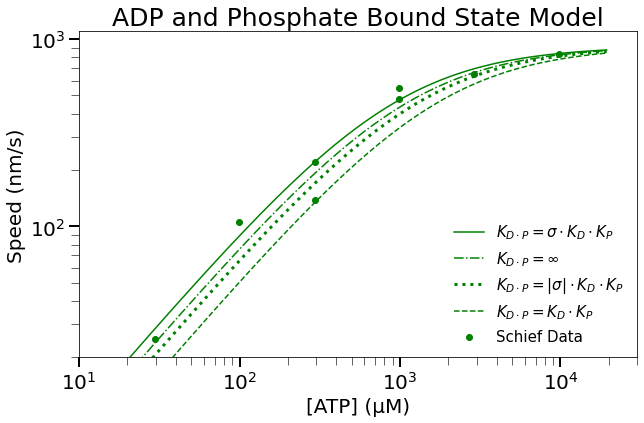

In [63]:
fig, ax = plt.subplots(figsize = (10,6))

plt.scatter(schief2_df_g['gx'], schief2_df_g['gy'], color='g', label = 'Schief Data')

plt.plot(atpconc2, 
         8*kcat*(atpconc2/Km_k)/( (atpconc2/Km_k) + 1 + (1000/Kd) + (5000/Kp) + ((1000*5000)/(sigma*Kd*Kp)) ), 
         color='g',
         linewidth = 1.5,
        label = '$K_{D \cdot P} = \sigma \cdot K_D \cdot K_P$')

plt.plot(atpconc2, 
         8*kcat*(atpconc2/Km_k)/( (atpconc2/Km_k) + 1 + (1000/Kd) + (5000/Kp) ), 
         color='g', 
         linestyle = 'dashdot',
         linewidth = 1.5,
         label = '$K_{D \cdot P} = \infty$')

plt.plot(atpconc2, 
         8*kcat*(atpconc2/Km_k)/( (atpconc2/Km_k) + 1 + (1000/Kd) + (5000/Kp) + ((1000*5000)/(-sigma*Kd*Kp)) ), 
         color='g', 
         linestyle = 'dotted', 
         linewidth = 3,
         label = '$K_{D \cdot P} = |\sigma| \cdot K_D \cdot K_P$')

plt.plot(atpconc2, 
         8*kcat*(atpconc2/Km_k)/( (atpconc2/Km_k) + 1 + (1000/Kd) + (5000/Kp) + ((1000*5000)/(Kd*Kp)) ), 
         color='g', 
         linestyle = 'dashed',
         linewidth = 1.5,
         label = '$K_{D \cdot P} = K_D \cdot K_P$')

# Using Schief value
# plt.plot(atpconc2, 
#          8*kcat*(atpconc2/Km_k)/( (atpconc2/Km_k) + 1 + (1000/Kd) + (5000/Kp) + ((1000*5000)/(95000)) ), 
#          color='r', 
#          linestyle = 'dotted', 
#          linewidth = 3,
#          label = '$K_{D \cdot P} = |\sigma| \cdot K_D \cdot K_P$')


plt.xscale('log')
plt.yscale('log')
plt.xlabel('[ATP] (µM)', size=20)
plt.ylabel('Speed (nm/s)', size=20)
plt.xticks(fontsize = 20)
plt.tick_params(which='major', length = 10, width = 2)
plt.tick_params(which='minor', length = 8)
plt.yticks(fontsize = 20)
plt.ylim(20, 1100)
plt.xlim(10, 30000)
plt.title ('ADP and Phosphate Bound State Model', size = 25)
plt.legend(framealpha=0, fontsize = 15, loc='lower right')#, bbox_to_anchor=(1, 1.05))

fig.savefig('Schief2_Kdp-exploration')

## Fit only Km and keep gamma or kcat fixed

This function only fits Kprod. It is assumed that kcat is taken to be the value from the no product curve fit

In [16]:
#Curve-fit to the Langmuir curve
def Kprod_curve_fit(prodconc, speeds, ATPconc, kcat, Kt, maxconc, d, p0):
    """
    Performs a curve fitting using scipy.optimize.curve_fit to fit data
    
    Parameters
    conc = 1D array of ATP concentrations in uM units
    speeds = 1D array of measured motor speeds in 1/s units
    maxconc = maximum concentration of data taken in uM units
    p0 = 1D list with 2 entries of parameter guesses for kcat and Km
    
    Returns
    param = 1D list with fit values of each parameter (kcat and Km)
    curve = 1D array of motor speeds for every concentration value in xvals
    xvals = 1D array from 0 to maxconc with step size 1
    """
    
    def Kprod_eqn(prodconc, Kprod, ATPconc=ATPconc, Kt=Kt):
        """
        Given a concentration value in uM, this function returns motor speeds in nm/s

        Parameters:
        conc = 1D array of ATP concentrations in uM units
        kcat = maximum hydrolysis rate at saturating ATP units 1/s
        Km = concnetration at which motors walk at half max speed in units uM

        Returns:
        A 1D array of motor speeds corresponding to the given concentrations
        """
        return (ATPconc)/(Kt*(1 + prodconc/Kprod) + ATPconc)

    #Curve fits and returns parameter values as well as the covarience
    param, param_cov = curve_fit(Kprod_eqn, 
                                 prodconc,
                                 speeds/(d*kcat),
                                 p0, 
                                 bounds = (np.zeros(1), np.ones([1])*np.inf))

    #stores the new function information according to the coefficients given by curve-fit() function 
    xvals=np.linspace(0, int(maxconc+1), int(maxconc+1))
    curve = d*kcat*Kprod_eqn(xvals, param[0])
    
    return param, curve, xvals


### Phosphate

In [17]:
param4A_k, speeds4A_k, atpconc4A = Kprod_curve_fit(schief4A_df_k['kx'], 
                                                                 schief4A_df_k['ky'], 
                                                                 100,
                                                                 kcat,
                                                                 Kt,
                                                                 np.max(schief4A_df_k['kx']),
                                                                 8, 
                                                                 [28.1])
                                                        
param4A_y, speeds4A_y, atpconc4A = Kprod_curve_fit(schief4A_df_y['yx'], 
                                                                 schief4A_df_y['yy'],
                                                                 300,
                                                                 kcat,
                                                                 Kt,
                                                                 np.max(schief4A_df_k['kx']), 
                                                                 8, 
                                                                 [28.1])
                                                                 
param4A_g, speeds4A_g, atpconc4A = Kprod_curve_fit(schief4A_df_g['gx'], 
                                                                 schief4A_df_g['gy'],
                                                                 10,
                                                                 kcat,
                                                                 Kt,
                                                                 np.max(schief4A_df_k['kx']), 
                                                                 8,
                                                                 [28.1])
                                                                 
param4A_b, speeds4A_b, atpconc4A = Kprod_curve_fit(schief4A_df_b['bx'], 
                                                                 schief4A_df_b['by'], 
                                                                 5,
                                                                 kcat,
                                                                 Kt,
                                                                 np.max(schief4A_df_k['kx']), 
                                                                 8, 
                                                                 [28.1])
                                                                 
param4A_r, speeds4A_r, atpconc4A = Kprod_curve_fit(schief4A_df_r['rx'], 
                                                                 schief4A_df_r['ry'], 
                                                                 30,
                                                                 kcat,
                                                                 Kt,
                                                                 np.max(schief4A_df_k['kx']), 
                                                                 8, 
                                                                 [28.1])
                                                                 
param4A_c, speeds4A_c, atpconc4A = Kprod_curve_fit(schief4A_df_c['cx'], 
                                                                 schief4A_df_c['cy'], 
                                                                 1000,
                                                                 kcat,
                                                                 Kt,
                                                                 np.max(schief4A_df_k['kx']), 
                                                                 8, 
                                                                 [28.1])
                                                                 


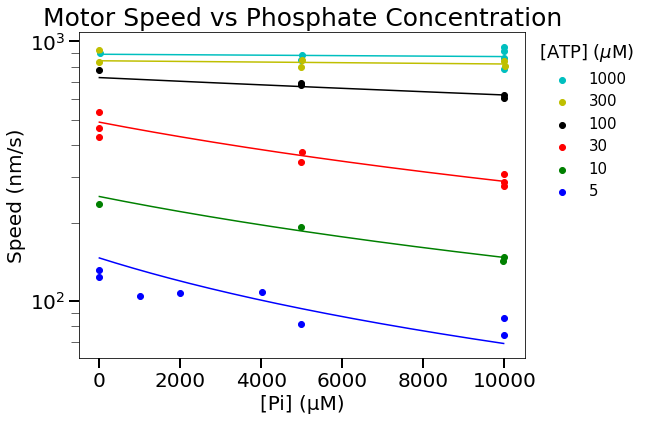

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))

plt.scatter(schief4A_df_c['cx'], schief4A_df_c['cy'], color='c', label = '1000')
plt.scatter(schief4A_df_y['yx'], schief4A_df_y['yy'], color='y', label = '300')
plt.scatter(schief4A_df_k['kx'], schief4A_df_k['ky'], color='k', label = '100')
plt.scatter(schief4A_df_r['rx'], schief4A_df_r['ry'], color='r', label = '30')
plt.scatter(schief4A_df_g['gx'], schief4A_df_g['gy'], color='g', label = '10')
plt.scatter(schief4A_df_b['bx'], schief4A_df_b['by'], color='b', label = '5')

plt.plot(atpconc4A, speeds4A_k, color='k')
plt.plot(atpconc4A, speeds4A_y, color='y')
plt.plot(atpconc4A, speeds4A_g, color='g')
plt.plot(atpconc4A, speeds4A_b, color='b')
plt.plot(atpconc4A, speeds4A_r, color='r')
plt.plot(atpconc4A, speeds4A_c, color='c')

plt.yscale('log')
plt.xlabel('[Pi] (µM)', size = 20)
plt.ylabel('Speed (nm/s)', size = 20)
plt.title ('Motor Speed vs Phosphate Concentration', size=25)
plt.legend(title = '[ATP] ($\mu$M)', framealpha=0, title_fontsize = 18, fontsize = 15, bbox_to_anchor=(1, 1.01))
plt.xticks(fontsize = 20)
plt.tick_params(which='major', length = 10, width = 2)
plt.tick_params(which='minor', length = 8)
plt.yticks(fontsize = 20);

#fig.savefig('Schief4Aphosphate_Kprodfit', bbox_inches='tight')

In [19]:
print('cyan: Kprod = ' + str(round(param4A_c[0], 1)))
print('black: Kprod = ' + str(round(param4A_k[0], 1)))
print('yellow: Kprod = ' + str(round(param4A_y[0], 1)))
print('green: Kprod = ' + str(round(param4A_g[0], 1)))
print('blue: Kprod = ' + str(round(param4A_b[0], 1)))
print('red: Kprod = ' + str(round(param4A_r[0], 1)))

cyan: Kprod = 12233.5
black: Kprod = 12457.9
yellow: Kprod = 27825.4
green: Kprod = 10104.9
blue: Kprod = 7395.4
red: Kprod = 6756.9


In [20]:
print('Kp average: ' + str(np.average((param4A_k[0], param4A_k[0], param4A_k[0], param4A_k[0], param4A_r[0]))) + ' µM')

Kp average: 11317.681496430312 µM


### ADP

In [21]:
param4B_k, speeds4B_k, atpconc4B = Kprod_curve_fit(schief4B_df_k['kx'], 
                                                                 schief4B_df_k['ky'], 
                                                                 10000,
                                                                 kcat,
                                                                 Kt,
                                                                 np.max(schief4B_df_k['kx']),
                                                                 8, 
                                                                 [28.1])
param4B_y, speeds4B_y, atpconc4B = Kprod_curve_fit(schief4B_df_y['yx'], 
                                                                 schief4B_df_y['yy'],
                                                                 20000,
                                                                 kcat,
                                                                 Kt,
                                                                 np.max(schief4B_df_k['kx']), 
                                                                 8, 
                                                                 [28.1])
param4B_g, speeds4B_g, atpconc4B = Kprod_curve_fit(schief4B_df_g['gx'], 
                                                                 schief4B_df_g['gy'],
                                                                 1000,
                                                                 kcat,
                                                                 Kt,
                                                                 np.max(schief4B_df_k['kx']), 
                                                                 8, 
                                                                 [28.1])
param4B_b, speeds4B_b, atpconc4B = Kprod_curve_fit(schief4B_df_b['bx'], 
                                                                 schief4B_df_b['by'], 
                                                                 300,
                                                                 kcat,
                                                                 Kt,
                                                                 np.max(schief4B_df_k['kx']), 
                                                                 8, 
                                                                 [28.1])
param4B_r, speeds4B_r, atpconc4B = Kprod_curve_fit(schief4B_df_r['rx'], 
                                                                 schief4B_df_r['ry'], 
                                                                 3000,
                                                                 kcat,
                                                                 Kt,
                                                                 np.max(schief4B_df_k['kx']), 
                                                                 8, 
                                                                 [28.1])

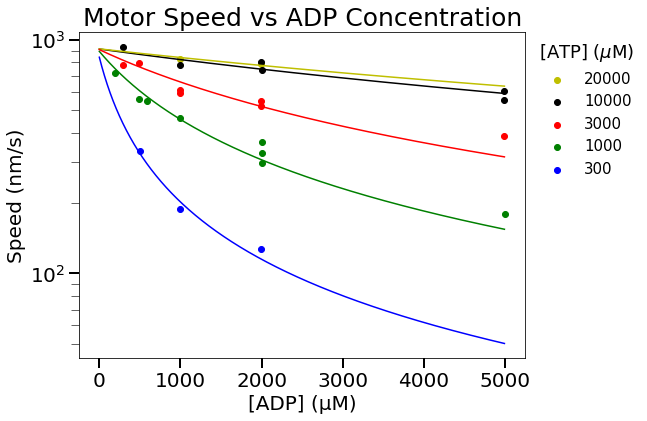

In [22]:
fig,ax = plt.subplots(figsize=(8,6))

plt.scatter(schief4B_df_y['yx'], schief4B_df_y['yy'], color='y', label = '20000')
plt.scatter(schief4B_df_k['kx'], schief4B_df_k['ky'], color='k', label = '10000')
plt.scatter(schief4B_df_r['rx'], schief4B_df_r['ry'], color='r', label = '3000')
plt.scatter(schief4B_df_g['gx'], schief4B_df_g['gy'], color='g', label = '1000')
plt.scatter(schief4B_df_b['bx'], schief4B_df_b['by'], color='b', label = '300')

plt.plot(atpconc4B, speeds4B_k, color='k')
plt.plot(atpconc4B, speeds4B_y, color='y')
plt.plot(atpconc4B, speeds4B_g, color='g')
plt.plot(atpconc4B, speeds4B_b, color='b')
plt.plot(atpconc4B, speeds4B_r, color='r')

plt.yscale('log')
plt.xlabel('[ADP] (µM)', size = 20)
plt.ylabel('Speed (nm/s)', size = 20)
plt.title ('Motor Speed vs ADP Concentration', size=25)
plt.legend(title = '[ATP] ($\mu$M)', framealpha=0, title_fontsize = 18, fontsize = 15, bbox_to_anchor=(1, 1.01))
plt.xticks(fontsize = 20)
plt.tick_params(which='major', length = 10, width = 2)
plt.tick_params(which='minor', length = 8)
plt.yticks(fontsize = 20);

#fig.savefig('Schief4Badp_Kprodfit', bbox_inches='tight')

In [23]:
print('black: kcat = ' + str(round(param4B_k[0], 1)))
print('yellow: kcat = ' + str(round(param4B_y[0], 1)))
print('green: kcat = ' + str(round(param4B_g[0], 1)))
print('blue: kcat = ' + str(round(param4B_b[0], 1)))
print('red: kcat = ' + str(round(param4B_r[0], 1)))

black: kcat = 23.8
yellow: kcat = 14.7
green: kcat = 26.7
blue: kcat = 25.4
red: kcat = 23.0


In [24]:
print('Kadp average: ' + str(np.average((param4B_k[0], param4B_k[0], param4B_k[0], param4B_k[0], param4B_r[0]))) + ' µM')

Kadp average: 23.603423057191037 µM


## Check how the different methods fit the data

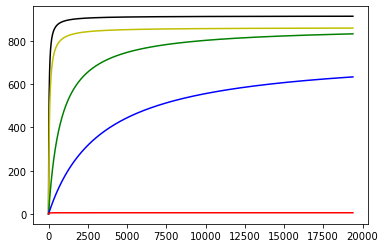

In [27]:
d=8

plt.plot(atpconc2, d*(114.5*atpconc2)/(26.2 +atpconc2), color = 'k')
plt.plot(atpconc2, d*(107.80952380952381*atpconc2)/(56.4973544973545 +atpconc2), color = 'y')
plt.plot(atpconc2, d*(108.48333333333333*atpconc2)/(805.228781310212 +atpconc2), color = 'g')
plt.plot(atpconc2, d*(92.98571428571428*atpconc2)/(3358.651919900908 +atpconc2), color = 'b')
plt.plot(atpconc2, d*(0.6748734741839815*atpconc2)/(13.919546847886444 +atpconc2), color = 'r')

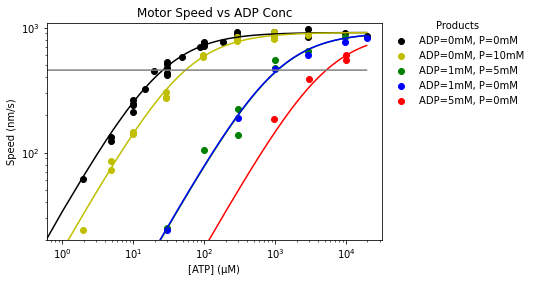

In [28]:
color = ['k', 'y', 'g', 'b', 'r']
pconc = [0, 10000, 5000, 0, 0,]
adpconc = [0, 0, 1000, 1000, 5000]
for i, color in enumerate(color):
    #plt.plot(atpconc2, 8*114.5*(atpconc2/26.2)/(1 + (atpconc2/26.2) + (pconc[i]/11318) + (adpconc[i]/23.6) ), color = color)
    plt.plot(atpconc2, 8*114.5*(atpconc2/26.2)/(1 + (atpconc2/26.2) + (pconc[i]/9241) + (adpconc[i]/25.1) ), color = color)
    
#+ (pconc[i]*adpconc[i]/(11318*23.6))

plt.scatter(schief2_df_k['kx'], schief2_df_k['ky'], color='k', label = 'ADP=0mM, P=0mM')
plt.scatter(schief2_df_y['yx'], schief2_df_y['yy'], color='y', label = 'ADP=0mM, P=10mM')
plt.scatter(schief2_df_g['gx'], schief2_df_g['gy'], color='g', label = 'ADP=1mM, P=5mM')
plt.scatter(schief2_df_b['bx'], schief2_df_b['by'], color='b', label = 'ADP=1mM, P=0mM')
plt.scatter(schief2_df_r['rx'], schief2_df_r['ry'], color='r', label = 'ADP=5mM, P=0mM')
plt.plot(atpconc2, (114.5*8/2)*np.ones(len(atpconc2)), color ='grey')
#plt.plot(Kdp*np.ones(2), [1, 1000] ,color = 'grey')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('[ATP] (µM)')
plt.ylabel('Speed (nm/s)')
plt.ylim(20, 1100)
plt.title ('Motor Speed vs ADP Conc')
plt.legend(title = 'Products', framealpha=0, bbox_to_anchor=(1, 1.05))

(20, 1000)

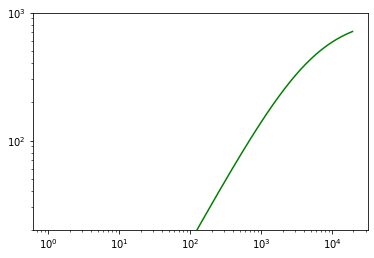

In [108]:
plt.plot(atpconc2, 8*114.5*(atpconc2/26.2)/(1 + (atpconc2/26.2) + (pconc[2]/11318) + (adpconc[2]/23.6)), color = 'g')
plt.xscale('log')
plt.yscale('log')
plt.ylim(20, 1000)

Define variables for the measured parameters from the paper (Table 1)

In [10]:
kcat00 = 113.2 #1/s
Km00 = 28.1 # uM
KiP = 9000 #uM
KiiP = 200000 #uM
KiADP = 34.6 #uM
KiiADP = 23000 #uM
KiADPP = 95000 #uM
KiiADPP = 30000 #uM

Make a data frame for the experimental conditions

In [11]:
exp_condit = pd.DataFrame([[0, 0, 1000, 5000, 1000], [0, 10000, 0, 0, 5000]], 
                          index = ['[ADP] (mM)', '[Pi] (mM)'], 
                          columns = ['k', 'y', 'g', 'b', 'r'])
exp_condit


,k,y,g,b,r
[ADP] (mM),0,0,1000,5000,1000
[Pi] (mM),0,10000,0,0,5000


use equations 2 and 3 from the paper and the measured parameters from table 1 to see what the kcat and Km values should be for all the experimental conditions

In [12]:
for color in ['k', 'y', 'g', 'b', 'r']:
    ADP = exp_condit[color]['[ADP] (mM)']
    Pi = exp_condit[color]['[Pi] (mM)']
    print(color)
    kcat = kcat00/(1 + (ADP/KiiADP) + (Pi/KiiP) + (ADP*Pi/KiiADPP))
    Km = (kcat*Km00/kcat00)*(1 + (ADP/KiADP) + (Pi/KiP) + (ADP*Pi/KiADPP))
    print(1 + (ADP/KiiADP) + (Pi/KiiP) + (ADP*Pi/KiiADPP))
    print(1 + (ADP/KiADP) + (Pi/KiP) + (ADP*Pi/KiADPP))
    print('kcat = ' + str(kcat) + ',  Km = ' + str(Km))

k
1.0
1.0
kcat = 113.2,  Km = 28.1
y
1.05
2.111111111111111
kcat = 107.80952380952381,  Km = 56.4973544973545
g
1.0434782608695652
29.90173410404624
kcat = 108.48333333333333,  Km = 805.228781310212
b
1.2173913043478262
145.50867052023122
kcat = 92.98571428571428,  Km = 3358.651919900908
r
167.73514492753623
83.08886860697021
kcat = 0.6748734741839815,  Km = 13.919546847886444


Welp these really don't match the values from the fitted curves. Some thoughts:
- the trends don't make sense in the lsited parameters above. kcat should go lowest - red, blue, green, black, yellow - highest based on Fig 2 and Km should go lowest - black, yellow, green, blue, red - highest basded on Fig 2
- Something else must be measured - between eqns 2 and 3 there are at ≥2 unknowns for 2 equations. Not sure how to fit Ki, Kii, for ADP and P when both are present. I.e. if we take kcat, Km, kcat00, and Km00 to be fit in Fig 2, then we can solve for Ki and Kii if only one species is present. maybe doing this lets us figure out the values for ADP and Pi independently and then use these values for ADPxP together. But, this still doesn't make the measured paper parameters match the fitted Fig 2 parameters
- Is there a regeneration system here?
- What is an experiment for figures 3, 4, 5. Are these experimentally measured or gathered from figure 2. How is kcat in fig 3 measured or infered?

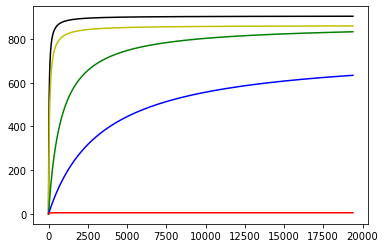

In [13]:
d=8

plt.plot(atpconc, d*(113.2*atpconc)/(28.1 +atpconc), color = 'k')
plt.plot(atpconc, d*(107.80952380952381*atpconc)/(56.4973544973545 +atpconc), color = 'y')
plt.plot(atpconc, d*(108.48333333333333*atpconc)/(805.228781310212 +atpconc), color = 'g')
plt.plot(atpconc, d*(92.98571428571428*atpconc)/(3358.651919900908 +atpconc), color = 'b')
plt.plot(atpconc, d*(0.6748734741839815*atpconc)/(13.919546847886444 +atpconc), color = 'r')